In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import json
# from src.utils import program_to_dsl, dsl_to_program
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

budget: 12
[Quivr] budget: 12, # data: 8, f1_median: 0.046, runtime_median: 3353.0
[Quivr] budget: 12, # data: 8, f1_median: 0.211, runtime_median: 928.0
[Quivr] budget: 12, # data: 1, f1_median: 0.054, runtime_median: 2669.0
[Quivr] budget: 12, # data: 11, f1_median: 0.174, runtime_median: 1093.0
[Quivr] budget: 12, # data: 5, f1_median: 0.117, runtime_median: 1679.0
[Quivr] budget: 12, # data: 2, f1_median: 0.105, runtime_median: 5382.0
[Quivr] budget: 12, # data: 7, f1_median: 0.117, runtime_median: 4923.0
[Quivr] budget: 12, # data: 12, f1_median: 0.11, runtime_median: 2026.0
[Quivr] budget: 12, # data: 6, f1_median: 0.174, runtime_median: 2775.0
[Quivr] budget: 12, # data: 1, f1_median: 0.046, runtime_median: 3683.0
[Quivr] budget: 12, # data: 0, f1_median: 0.0, runtime_median: 0.0
[Quivr] budget: 12, # data: 1, f1_median: 0.139, runtime_median: 1662.0
[Quivr] budget: 12, # data: 1, f1_median: 0.032, runtime_median: 2620.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 

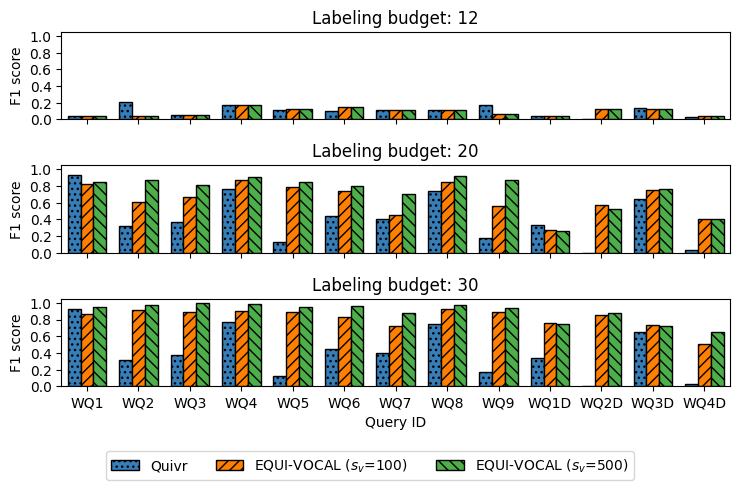

In [2]:
def plot_bar_score_full(budgets):
    query_strs = [
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o0)), Eastward2(o1))",
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o0)), Eastward3(o1))",
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward4(o0)), Eastward4(o1))",
        "Conjunction(Eastward2(o0), HighAccel_2(o0)); Conjunction(Eastward2(o1), HighAccel_2(o1))",
        "Conjunction(Eastward3(o0), HighAccel_2(o0)); Conjunction(Eastward3(o1), HighAccel_2(o1))",
        "Conjunction(Eastward4(o0), HighAccel_2(o0)); Conjunction(Eastward4(o1), HighAccel_2(o1))",
        "Conjunction(Southward1Upper(o0), Westward2(o1)); Conjunction(Westward2(o0), Westward2(o1))",
        "Conjunction(Eastward2(o0), Eastward4(o1)); Conjunction(Eastward2(o0), Eastward3(o1))",
        "Conjunction(Eastward2(o1), Eastward4(o0)); Conjunction(Eastward2(o1), Eastward3(o0))",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o1)), Eastward3(o0)), 5)",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o1)), Eastward4(o0)), 5)",
        "Duration(Conjunction(Conjunction(Eastward2(o1), Eastward3(o0)), Faster_1.5(o0, o1)), 5)",
        "Duration(Conjunction(Conjunction(Eastward3(o1), Eastward4(o0)), Faster_1.5(o0, o1)), 5)"
    ]
    
    fig, axs = plt.subplots(len(budgets), 1, figsize = (7.5, 4.5)) 
    
    exp_dir = "/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/outputs/warsaw/stats/"
    
    n_sampled_videos_list = [100, 500]
    hatch_list = ['...', '///', '\\\\\\', 'xxx']
    position_offsets = list(range(-len(n_sampled_videos_list)-1, 0, 1))
    legend_labels = []
    for col_id, budget in enumerate(budgets):
        print("budget:", budget)
        query_id = ["WQ{}".format(i) for i in range(1,  10)] + ["WQ{}D".format(i) for i in range(1,  5)]
        handles_f1 = []
        handles_runtime = []
        legend_labels = []
        
        # Quivr
        quivr_f1_data = []
        quivr_f1_bar_data = []
        quivr_runtime_data = []
        for qid, query_str in enumerate(query_strs):
            quivr_f1 = []
            quivr_runtime = []
            if qid < 9:
                config_name = "quivr_original_no_kleene/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_1-thread_1-lru_None"
            else:
                config_name = "quivr_original/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_5-thread_1-lru_None"
            for run in range(20):
                try:
                    with open(os.path.join(exp_dir, 
                                           config_name,
                                           "{}-{}.json".format(query_str, run)), "r") as f:
                        quivr_stats = json.load(f)
                    quivr_runtime_per_run = quivr_stats["runtime"]
                    quivr_f1_per_run = quivr_stats["score_median"]
                    quivr_f1.append(quivr_f1_per_run)
                    quivr_runtime.append(quivr_runtime_per_run)
                except:
                    pass
            quivr_x = list(range(12, 51))
            x_idx = quivr_x.index(budget)
            quivr_f1 = np.array(quivr_f1)
            if not np.any(quivr_f1): # empty array
                quivr_f1 = [0] * 20
            else:
                quivr_f1 = quivr_f1[:, x_idx]
            quivr_runtime = np.array(quivr_runtime)
            if not np.any(quivr_runtime): # empty array
                quivr_runtime = [0] * 20
            else:
                quivr_runtime = quivr_runtime[:, x_idx]
            quivr_f1_data.append(quivr_f1)
            quivr_f1_bar_data.append(np.median(quivr_f1))
            quivr_runtime_data.append(quivr_runtime)
            print("[Quivr] budget: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, 0 if np.median(quivr_f1) == 0 else len(quivr_f1), np.round(np.median(quivr_f1), 3), np.round(np.median(quivr_runtime))))
        bp_f1 = axs[col_id].bar(np.array(range(len(quivr_f1_data)))*(len(n_sampled_videos_list)+2)+position_offsets[0], quivr_f1_bar_data, 1, label="Quivr", color=CB_color_cycle[0], hatch = hatch_list[0], edgecolor="black")   
#         legend_labels.append("Quivr")

        
        # VOCAL
        for idx, n_sampled_videos in enumerate(n_sampled_videos_list):
            
            f1_data = []
            f1_bar_data = []
            runtime_data = []
            for qid, query_str in enumerate(query_strs):
                if qid < 9:
                    config_name = "vocal_postgres-topk-max_d_1-n_sampled_videos_{}".format(n_sampled_videos)
                else:
                    config_name = "vocal_postgres-topk-max_d_15-n_sampled_videos_{}".format(n_sampled_videos)
                f1 = []
                runtime = []
                try:
                    with open(os.path.join(exp_dir, config_name, "{}.json".format(query_str)), "r") as f:
                        stats = json.load(f)
                    x = [12, 15, 20, 25, 30, 40, 50]
                    x_idx = x.index(budget)
                    runtime = np.array(stats["runtime"])
                    f1 = np.array(stats["score_median"])
                    f1 = f1[:, x_idx]
                    runtime = runtime[:, x_idx]
                    if np.all(f1 == -1):
                        f1 = np.zeros_like(f1)
                    else:
                        f1[f1 == -1] = np.nan
                    f1 = f1[~np.isnan(f1)]
                    if np.all(runtime == -1):
                        runtime = np.zeros_like(runtime)
                    else:
                        runtime[runtime == -1] = np.nan
                    runtime = runtime[~np.isnan(runtime)]
                except:
                    pass
                print("budget: {}, n_sampled_videos: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, n_sampled_videos, len(f1), np.round(np.median(f1), 3), np.round(np.median(runtime))))
                f1_data.append(f1)
                f1_bar_data.append(np.median(f1))
                runtime_data.append(runtime)  
            bp_f1 = axs[col_id].bar(np.array(range(len(f1_data)))*(len(n_sampled_videos_list)+2)+position_offsets[idx+1], f1_bar_data, 1, label="EQUI-VOCAL ($s_v$={})".format(n_sampled_videos), color=CB_color_cycle[idx+1], hatch = hatch_list[idx+1], edgecolor="black")   
#             legend_labels.append("s_v={}".format(n_sampled_videos))
        
        axs[col_id].set(xlabel="Query ID", ylabel="F1 score")
        axs[col_id].set_ylim(bottom=0, top=1.05)
        axs[col_id].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[col_id].set_xticks(np.arange(-(len(n_sampled_videos_list)+2)/2, len(query_id)*(len(n_sampled_videos_list)+2)-(len(n_sampled_videos_list)+2)/2, len(n_sampled_videos_list)+2))
        axs[col_id].set_xlim(left=-4, right=48)
        axs[col_id].set_xticklabels(query_id)
        axs[col_id].title.set_text("Labeling budget: {}".format(budget))
            
    for ax in axs.flat:
        ax.label_outer()
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=4)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/warsaw_scores.pdf", bbox_inches='tight', pad_inches=0, dpi=600)
# plot_scene_graph(budgets=[12, 15, 20, 30, 40])
plot_bar_score_full(budgets=[12, 20, 30])

budget: 12
[Quivr] budget: 12, # data: 8, f1_median: 0.046, runtime_median: 3353.0
[Quivr] budget: 12, # data: 8, f1_median: 0.211, runtime_median: 928.0
[Quivr] budget: 12, # data: 1, f1_median: 0.054, runtime_median: 2669.0
[Quivr] budget: 12, # data: 11, f1_median: 0.174, runtime_median: 1093.0
[Quivr] budget: 12, # data: 5, f1_median: 0.117, runtime_median: 1679.0
[Quivr] budget: 12, # data: 2, f1_median: 0.105, runtime_median: 5382.0
[Quivr] budget: 12, # data: 7, f1_median: 0.117, runtime_median: 4923.0
[Quivr] budget: 12, # data: 12, f1_median: 0.11, runtime_median: 2026.0
[Quivr] budget: 12, # data: 6, f1_median: 0.174, runtime_median: 2775.0
[Quivr] budget: 12, # data: 1, f1_median: 0.046, runtime_median: 3683.0
[Quivr] budget: 12, # data: 0, f1_median: 0.0, runtime_median: 0.0
[Quivr] budget: 12, # data: 1, f1_median: 0.139, runtime_median: 1662.0
[Quivr] budget: 12, # data: 1, f1_median: 0.032, runtime_median: 2620.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 

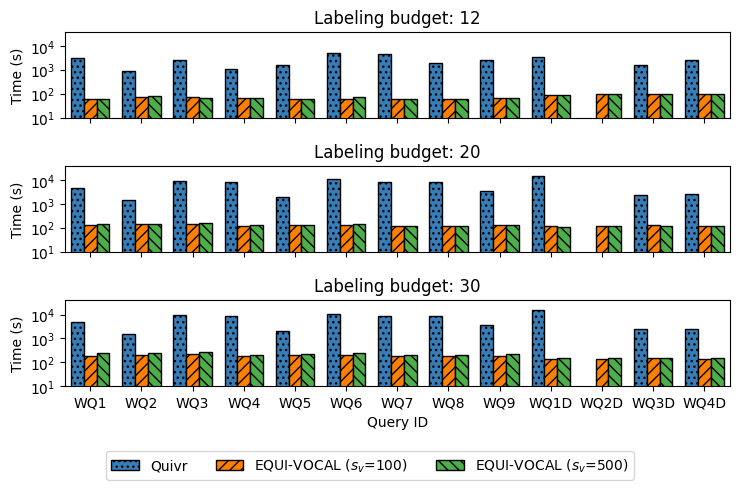

In [3]:
def plot_bar_runtime_full(budgets):
    query_strs = [
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o0)), Eastward2(o1))",
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o0)), Eastward3(o1))",
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward4(o0)), Eastward4(o1))",
        "Conjunction(Eastward2(o0), HighAccel_2(o0)); Conjunction(Eastward2(o1), HighAccel_2(o1))",
        "Conjunction(Eastward3(o0), HighAccel_2(o0)); Conjunction(Eastward3(o1), HighAccel_2(o1))",
        "Conjunction(Eastward4(o0), HighAccel_2(o0)); Conjunction(Eastward4(o1), HighAccel_2(o1))",
        "Conjunction(Southward1Upper(o0), Westward2(o1)); Conjunction(Westward2(o0), Westward2(o1))",
        "Conjunction(Eastward2(o0), Eastward4(o1)); Conjunction(Eastward2(o0), Eastward3(o1))",
        "Conjunction(Eastward2(o1), Eastward4(o0)); Conjunction(Eastward2(o1), Eastward3(o0))",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o1)), Eastward3(o0)), 5)",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o1)), Eastward4(o0)), 5)",
        "Duration(Conjunction(Conjunction(Eastward2(o1), Eastward3(o0)), Faster_1.5(o0, o1)), 5)",
        "Duration(Conjunction(Conjunction(Eastward3(o1), Eastward4(o0)), Faster_1.5(o0, o1)), 5)"
    ]
    
    fig, axs = plt.subplots(len(budgets), 1, figsize = (7.5, 4.5)) 
    
    exp_dir = "/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/outputs/warsaw/stats/"
    
    n_sampled_videos_list = [100, 500]
    hatch_list = ['...', '///', '\\\\\\', 'xxx']
    position_offsets = list(range(-len(n_sampled_videos_list)-1, 0, 1))
    legend_labels = []
    for col_id, budget in enumerate(budgets):
        print("budget:", budget)
        query_id = ["WQ{}".format(i) for i in range(1,  10)] + ["WQ{}D".format(i) for i in range(1,  5)]
        handles_f1 = []
        handles_runtime = []
        legend_labels = []
        
        # Quivr
        quivr_f1_data = []
        quivr_f1_bar_data = []
        quivr_runtime_data = []
        quivr_runtime_bar_data = []
        for qid, query_str in enumerate(query_strs):
            quivr_f1 = []
            quivr_runtime = []
            if qid < 9:
                config_name = "quivr_original_no_kleene/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_1-thread_1-lru_None"
            else:
                config_name = "quivr_original/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_5-thread_1-lru_None"
            for run in range(20):
                try:
                    with open(os.path.join(exp_dir, 
                                           config_name,
                                           "{}-{}.json".format(query_str, run)), "r") as f:
                        quivr_stats = json.load(f)
                    quivr_runtime_per_run = quivr_stats["runtime"]
                    quivr_f1_per_run = quivr_stats["score_median"]
                    quivr_f1.append(quivr_f1_per_run)
                    quivr_runtime.append(quivr_runtime_per_run)
                except:
                    pass
            quivr_x = list(range(12, 51))
            x_idx = quivr_x.index(budget)
            quivr_f1 = np.array(quivr_f1)
            if not np.any(quivr_f1): # empty array
                quivr_f1 = [0] * 20
            else:
                quivr_f1 = quivr_f1[:, x_idx]
            quivr_runtime = np.array(quivr_runtime)
            if not np.any(quivr_runtime): # empty array
                quivr_runtime = [0] * 20
            else:
                quivr_runtime = quivr_runtime[:, x_idx]
            quivr_f1_data.append(quivr_f1)
            quivr_f1_bar_data.append(np.median(quivr_f1))
            quivr_runtime_data.append(quivr_runtime)
            quivr_runtime_bar_data.append(np.median(quivr_runtime))
            print("[Quivr] budget: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, 0 if np.median(quivr_f1) == 0 else len(quivr_f1), np.round(np.median(quivr_f1), 3), np.round(np.median(quivr_runtime))))
        bp_runtime = axs[col_id].bar(np.array(range(len(quivr_runtime_data)))*(len(n_sampled_videos_list)+2)+position_offsets[0], quivr_runtime_bar_data, 1, label="Quivr", color=CB_color_cycle[0], hatch = hatch_list[0], edgecolor="black")   
#         legend_labels.append("Quivr")

        
        # VOCAL
        for idx, n_sampled_videos in enumerate(n_sampled_videos_list):
            
            f1_data = []
            f1_bar_data = []
            runtime_data = []
            runtime_bar_data = []
            for qid, query_str in enumerate(query_strs):
                if qid < 9:
                    config_name = "vocal_postgres-topk-max_d_1-n_sampled_videos_{}".format(n_sampled_videos)
                else:
                    config_name = "vocal_postgres-topk-max_d_15-n_sampled_videos_{}".format(n_sampled_videos)
                f1 = []
                runtime = []
                try:
                    with open(os.path.join(exp_dir, config_name, "{}.json".format(query_str)), "r") as f:
                        stats = json.load(f)
                    x = [12, 15, 20, 25, 30, 40, 50]
                    x_idx = x.index(budget)
                    runtime = np.array(stats["runtime"])
                    f1 = np.array(stats["score_median"])
                    f1 = f1[:, x_idx]
                    runtime = runtime[:, x_idx]
                    if np.all(f1 == -1):
                        f1 = np.zeros_like(f1)
                    else:
                        f1[f1 == -1] = np.nan
                    f1 = f1[~np.isnan(f1)]
                    if np.all(runtime == -1):
                        runtime = np.zeros_like(runtime)
                    else:
                        runtime[runtime == -1] = np.nan
                    runtime = runtime[~np.isnan(runtime)]
                except:
                    pass
                print("budget: {}, n_sampled_videos: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, n_sampled_videos, len(f1), np.round(np.median(f1), 3), np.round(np.median(runtime))))
                f1_data.append(f1)
                f1_bar_data.append(np.median(f1))
                runtime_data.append(runtime)  
                runtime_bar_data.append(np.median(runtime))
            bp_runtime = axs[col_id].bar(np.array(range(len(runtime_data)))*(len(n_sampled_videos_list)+2)+position_offsets[idx+1], runtime_bar_data, 1, label="EQUI-VOCAL ($s_v$={})".format(n_sampled_videos), color=CB_color_cycle[idx+1], hatch = hatch_list[idx+1], edgecolor="black")  
#             legend_labels.append("s_v={}".format(n_sampled_videos))
        
        axs[col_id].set(xlabel="Query ID", ylabel="Time (s)")
        axs[col_id].set_ylim(bottom=10, top=40000)
        axs[col_id].set_yscale('log')
        axs[col_id].set_yticks([10, 100, 1000, 10000])
        axs[col_id].set_xticks(np.arange(-(len(n_sampled_videos_list)+2)/2, len(query_id)*(len(n_sampled_videos_list)+2)-(len(n_sampled_videos_list)+2)/2, len(n_sampled_videos_list)+2))
        axs[col_id].set_xlim(left=-4, right=48)
        axs[col_id].set_xticklabels(query_id)
        axs[col_id].title.set_text("Labeling budget: {}".format(budget))
            
    for ax in axs.flat:
        ax.label_outer()
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=4)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/warsaw_runtime.pdf", bbox_inches='tight', pad_inches=0, dpi=600)
# plot_scene_graph(budgets=[12, 15, 20, 30, 40])
plot_bar_runtime_full(budgets=[12, 20, 30])

budget: 12
[Quivr] budget: 12, # data: 8, f1_median: 0.046, runtime_median: 3353.0
[Quivr] budget: 12, # data: 11, f1_median: 0.174, runtime_median: 1093.0
[Quivr] budget: 12, # data: 7, f1_median: 0.117, runtime_median: 4923.0
[Quivr] budget: 12, # data: 12, f1_median: 0.11, runtime_median: 2026.0
[Quivr] budget: 12, # data: 1, f1_median: 0.046, runtime_median: 3683.0
[Quivr] budget: 12, # data: 1, f1_median: 0.139, runtime_median: 1662.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 0.04, runtime_median: 60.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 0.174, runtime_median: 65.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 0.111, runtime_median: 63.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 0.116, runtime_median: 64.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 0.046, runtime_median: 95.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 0.12, runtime_median: 96.0
budget: 12, n_sampled_videos: 500, # data:

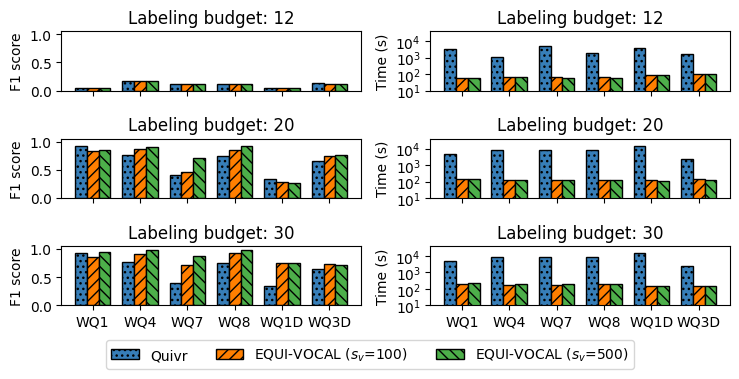

In [4]:
def plot_bar_vldb(budgets):
    query_strs = [
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o0)), Eastward2(o1))",
#         "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o0)), Eastward3(o1))",
#         "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward4(o0)), Eastward4(o1))",
        "Conjunction(Eastward2(o0), HighAccel_2(o0)); Conjunction(Eastward2(o1), HighAccel_2(o1))",
#         "Conjunction(Eastward3(o0), HighAccel_2(o0)); Conjunction(Eastward3(o1), HighAccel_2(o1))",
#         "Conjunction(Eastward4(o0), HighAccel_2(o0)); Conjunction(Eastward4(o1), HighAccel_2(o1))",
        "Conjunction(Southward1Upper(o0), Westward2(o1)); Conjunction(Westward2(o0), Westward2(o1))",
        "Conjunction(Eastward2(o0), Eastward4(o1)); Conjunction(Eastward2(o0), Eastward3(o1))",
#         "Conjunction(Eastward2(o1), Eastward4(o0)); Conjunction(Eastward2(o1), Eastward3(o0))",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o1)), Eastward3(o0)), 5)",
#         "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o1)), Eastward4(o0)), 5)",
        "Duration(Conjunction(Conjunction(Eastward2(o1), Eastward3(o0)), Faster_1.5(o0, o1)), 5)",
#         "Duration(Conjunction(Conjunction(Eastward3(o1), Eastward4(o0)), Faster_1.5(o0, o1)), 5)"
    ]
    
    fig, axs = plt.subplots(len(budgets), 2, figsize = (7.5, 3.5)) 
    
    exp_dir = "/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/outputs/warsaw/stats/"
    
    n_sampled_videos_list = [100, 500]
    hatch_list = ['...', '///', '\\\\\\', 'xxx']
    position_offsets = list(range(-len(n_sampled_videos_list)-1, 0, 1))
    legend_labels = []
    for col_id, budget in enumerate(budgets):
        print("budget:", budget)
        query_id = ["WQ1", "WQ4", "WQ7", "WQ8", "WQ1D", "WQ3D"]
        handles_f1 = []
        handles_runtime = []
        legend_labels = []
        
        # Quivr
        quivr_f1_data = []
        quivr_f1_bar_data = []
        quivr_runtime_data = []
        quivr_runtime_bar_data = []
        for qid, query_str in enumerate(query_strs):
            quivr_f1 = []
            quivr_runtime = []
            if qid < 4:
                config_name = "quivr_original_no_kleene/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_1-thread_1-lru_None"
            else:
                config_name = "quivr_original/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_5-thread_1-lru_None"
            for run in range(20):
                try:
                    with open(os.path.join(exp_dir, 
                                           config_name,
                                           "{}-{}.json".format(query_str, run)), "r") as f:
                        quivr_stats = json.load(f)
                    quivr_runtime_per_run = quivr_stats["runtime"]
                    quivr_f1_per_run = quivr_stats["score_median"]
                    quivr_f1.append(quivr_f1_per_run)
                    quivr_runtime.append(quivr_runtime_per_run)
                except:
                    pass
            quivr_x = list(range(12, 51))
            x_idx = quivr_x.index(budget)
            quivr_f1 = np.array(quivr_f1)
            if not np.any(quivr_f1): # empty array
                quivr_f1 = [0] * 20
            else:
                quivr_f1 = quivr_f1[:, x_idx]
            quivr_runtime = np.array(quivr_runtime)
            if not np.any(quivr_runtime): # empty array
                quivr_runtime = [0] * 20
            else:
                quivr_runtime = quivr_runtime[:, x_idx]
            quivr_f1_data.append(quivr_f1)
            quivr_f1_bar_data.append(np.median(quivr_f1))
            quivr_runtime_data.append(quivr_runtime)
            quivr_runtime_bar_data.append(np.median(quivr_runtime))
            print("[Quivr] budget: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, 0 if np.median(quivr_f1) == 0 else len(quivr_f1), np.round(np.median(quivr_f1), 3), np.round(np.median(quivr_runtime))))
        bp_f1 = axs[col_id][0].bar(np.array(range(len(quivr_f1_data)))*(len(n_sampled_videos_list)+2)+position_offsets[0], quivr_f1_bar_data, 1, label="Quivr", color=CB_color_cycle[0], hatch = hatch_list[0], edgecolor="black")   
        bp_runtime = axs[col_id][1].bar(np.array(range(len(quivr_runtime_data)))*(len(n_sampled_videos_list)+2)+position_offsets[0], quivr_runtime_bar_data, 1, label="Quivr", color=CB_color_cycle[0], hatch = hatch_list[0], edgecolor="black")   

        
        # VOCAL
        for idx, n_sampled_videos in enumerate(n_sampled_videos_list):
            
            f1_data = []
            f1_bar_data = []
            runtime_data = []
            runtime_bar_data = []
            for qid, query_str in enumerate(query_strs):
                if qid < 4:
                    config_name = "vocal_postgres-topk-max_d_1-n_sampled_videos_{}".format(n_sampled_videos)
                else:
                    config_name = "vocal_postgres-topk-max_d_15-n_sampled_videos_{}".format(n_sampled_videos)
                f1 = []
                runtime = []
                try:
                    with open(os.path.join(exp_dir, config_name, "{}.json".format(query_str)), "r") as f:
                        stats = json.load(f)
                    x = [12, 15, 20, 25, 30, 40, 50]
                    x_idx = x.index(budget)
                    runtime = np.array(stats["runtime"])
                    f1 = np.array(stats["score_median"])
                    f1 = f1[:, x_idx]
                    runtime = runtime[:, x_idx]
                    if np.all(f1 == -1):
                        f1 = np.zeros_like(f1)
                    else:
                        f1[f1 == -1] = np.nan
                    f1 = f1[~np.isnan(f1)]
                    if np.all(runtime == -1):
                        runtime = np.zeros_like(runtime)
                    else:
                        runtime[runtime == -1] = np.nan
                    runtime = runtime[~np.isnan(runtime)]
                except:
                    pass
                print("budget: {}, n_sampled_videos: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, n_sampled_videos, len(f1), np.round(np.median(f1), 3), np.round(np.median(runtime))))
                f1_data.append(f1)
                f1_bar_data.append(np.median(f1))
                runtime_data.append(runtime)  
                runtime_bar_data.append(np.median(runtime))
            bp_f1 = axs[col_id][0].bar(np.array(range(len(f1_data)))*(len(n_sampled_videos_list)+2)+position_offsets[idx+1], f1_bar_data, 1, label="EQUI-VOCAL ($s_v$={})".format(n_sampled_videos), color=CB_color_cycle[idx+1], hatch = hatch_list[idx+1], edgecolor="black")   
            bp_runtime = axs[col_id][1].bar(np.array(range(len(runtime_data)))*(len(n_sampled_videos_list)+2)+position_offsets[idx+1], runtime_bar_data, 1, label="EQUI-VOCAL ($s_v$={})".format(n_sampled_videos), color=CB_color_cycle[idx+1], hatch = hatch_list[idx+1], edgecolor="black")  

        axs[col_id][0].set_ylabel("F1 score")
        axs[col_id][0].set_ylim(bottom=0, top=1.05)
        axs[col_id][0].set_yticks([0, 0.5, 1])
        axs[col_id][0].set_xticks(np.arange(-(len(n_sampled_videos_list)+2)/2, len(query_id)*(len(n_sampled_videos_list)+2)-(len(n_sampled_videos_list)+2)/2, len(n_sampled_videos_list)+2))
        axs[col_id][0].set_xticklabels([])
        axs[col_id][0].title.set_text("Labeling budget: {}".format(budget))
        
        axs[col_id][1].set_ylabel("Time (s)")
        axs[col_id][1].set_ylim(bottom=10, top=40000)
        axs[col_id][1].set_yscale('log')
        axs[col_id][1].set_yticks([10, 100, 1000, 10000])
        axs[col_id][1].set_xticks(np.arange(-(len(n_sampled_videos_list)+2)/2, len(query_id)*(len(n_sampled_videos_list)+2)-(len(n_sampled_videos_list)+2)/2, len(n_sampled_videos_list)+2))
        axs[col_id][1].set_xticklabels([])
        axs[col_id][1].title.set_text("Labeling budget: {}".format(budget))
    for i in range(2):
        axs[len(budgets)-1][i].set_xticklabels(query_id)
#         axs[len(budgets)-1][i].set_xlabel("Query ID")
    handles, labels = axs[0][0].get_legend_handles_labels()
    fig.legend(handles, labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.03),
              fancybox=True, shadow=False, ncol=4)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/warsaw_vldb.pdf", bbox_inches='tight', pad_inches=0, dpi=600)
# plot_scene_graph(budgets=[12, 15, 20, 30, 40])
plot_bar_vldb(budgets=[12, 20, 30])

budget: 12
[Quivr] budget: 12, # data: 8, f1_median: 0.046, runtime_median: 3353.0
[Quivr] budget: 12, # data: 8, f1_median: 0.211, runtime_median: 928.0
[Quivr] budget: 12, # data: 1, f1_median: 0.054, runtime_median: 2669.0
[Quivr] budget: 12, # data: 11, f1_median: 0.174, runtime_median: 1093.0
[Quivr] budget: 12, # data: 5, f1_median: 0.117, runtime_median: 1679.0
[Quivr] budget: 12, # data: 2, f1_median: 0.105, runtime_median: 5382.0
[Quivr] budget: 12, # data: 7, f1_median: 0.117, runtime_median: 4923.0
[Quivr] budget: 12, # data: 11, f1_median: 0.108, runtime_median: 1735.0
[Quivr] budget: 12, # data: 6, f1_median: 0.174, runtime_median: 2775.0
[Quivr] budget: 12, # data: 0, f1_median: 0.0, runtime_median: 0.0
[Quivr] budget: 12, # data: 0, f1_median: 0.0, runtime_median: 0.0
[Quivr] budget: 12, # data: 0, f1_median: 0.0, runtime_median: 0.0
[Quivr] budget: 12, # data: 0, f1_median: 0.0, runtime_median: 0.0
budget: 12, n_sampled_videos: 100, # data: 20, f1_median: 0.04, runtime_

budget: 20
[Quivr] budget: 20, # data: 8, f1_median: 0.928, runtime_median: 4898.0
[Quivr] budget: 20, # data: 8, f1_median: 0.32, runtime_median: 1525.0
[Quivr] budget: 20, # data: 1, f1_median: 0.373, runtime_median: 9863.0
[Quivr] budget: 20, # data: 11, f1_median: 0.77, runtime_median: 8560.0
[Quivr] budget: 20, # data: 5, f1_median: 0.126, runtime_median: 1969.0
[Quivr] budget: 20, # data: 2, f1_median: 0.444, runtime_median: 11066.0
[Quivr] budget: 20, # data: 7, f1_median: 0.4, runtime_median: 8732.0
[Quivr] budget: 20, # data: 11, f1_median: 0.758, runtime_median: 7115.0
[Quivr] budget: 20, # data: 6, f1_median: 0.174, runtime_median: 3588.0
[Quivr] budget: 20, # data: 0, f1_median: 0.0, runtime_median: 0.0
[Quivr] budget: 20, # data: 0, f1_median: 0.0, runtime_median: 0.0
[Quivr] budget: 20, # data: 0, f1_median: 0.0, runtime_median: 0.0
[Quivr] budget: 20, # data: 0, f1_median: 0.0, runtime_median: 0.0
budget: 20, n_sampled_videos: 100, # data: 20, f1_median: 0.827, runtime_m

budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 1.0, runtime_median: 315.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 1.0, runtime_median: 359.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 1.0, runtime_median: 384.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 0.991, runtime_median: 285.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 0.984, runtime_median: 325.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 0.972, runtime_median: 345.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 0.946, runtime_median: 280.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 0.996, runtime_median: 277.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 0.993, runtime_median: 292.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 0.758, runtime_median: 196.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_median: 0.9, runtime_median: 198.0
budget: 40, n_sampled_videos: 500, # data: 20, f1_m

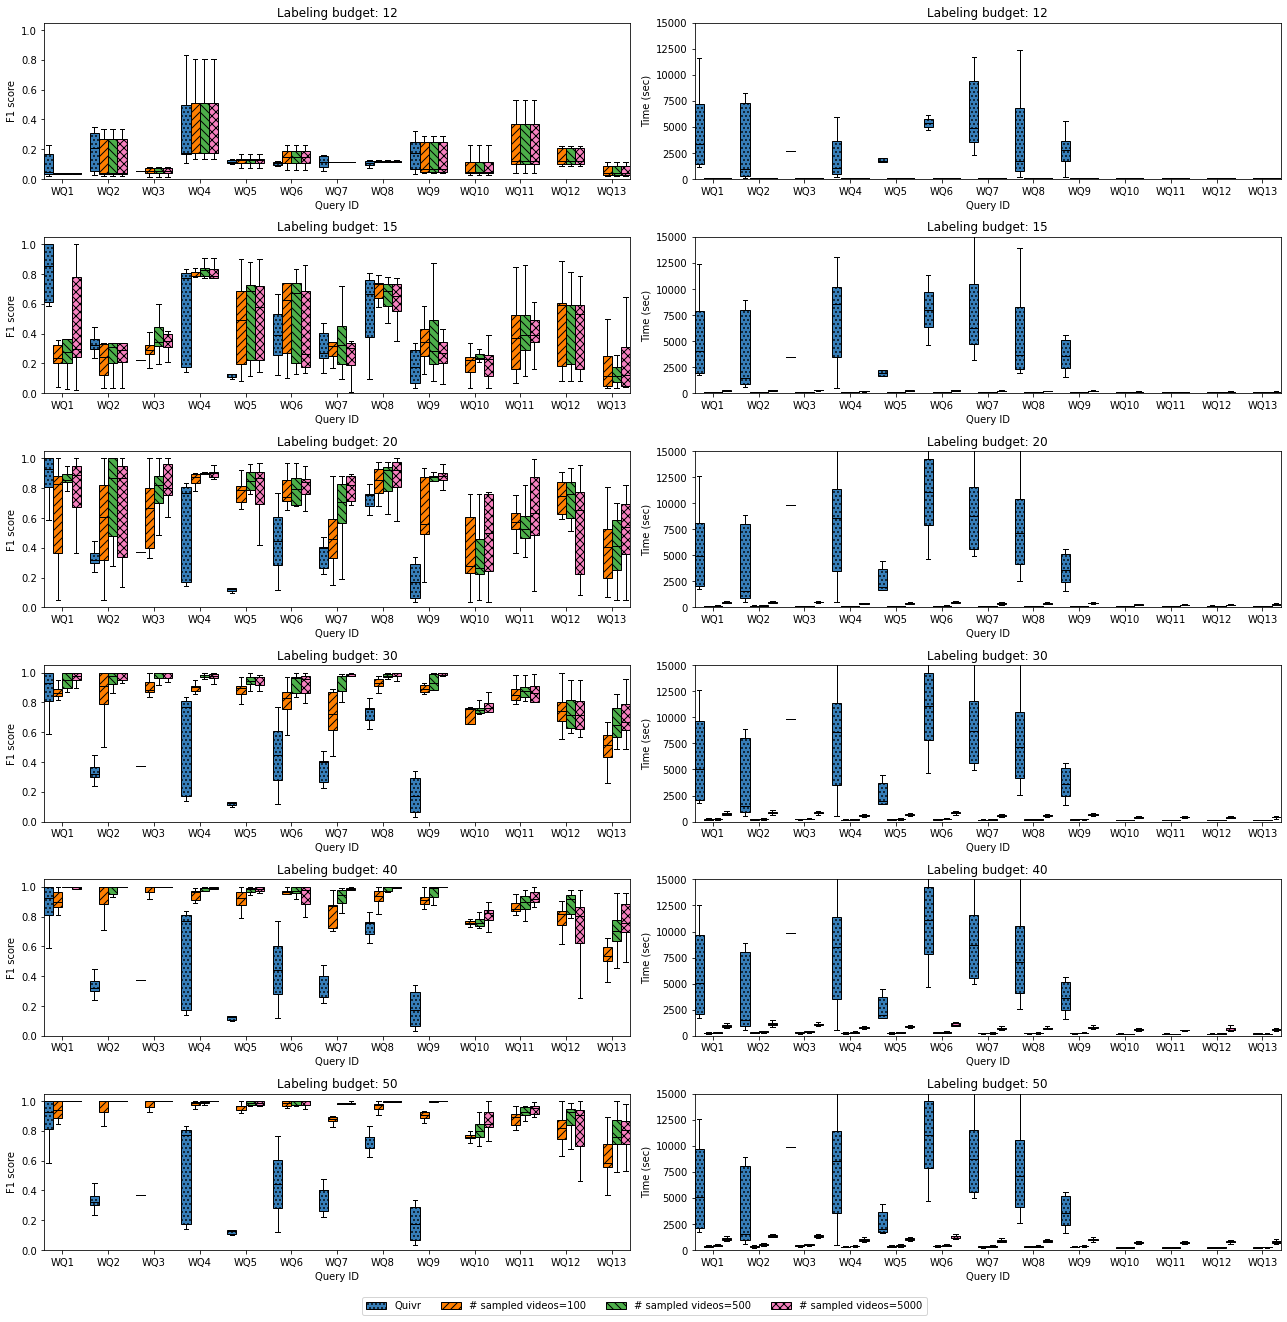

In [8]:
# Boxplot
def plot_scene_graph(budgets):
    query_strs = [
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o0)), Eastward2(o1))",
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o0)), Eastward3(o1))",
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward4(o0)), Eastward4(o1))",
        "Conjunction(Eastward2(o0), HighAccel_2(o0)); Conjunction(Eastward2(o1), HighAccel_2(o1))",
        "Conjunction(Eastward3(o0), HighAccel_2(o0)); Conjunction(Eastward3(o1), HighAccel_2(o1))",
        "Conjunction(Eastward4(o0), HighAccel_2(o0)); Conjunction(Eastward4(o1), HighAccel_2(o1))",
        "Conjunction(Southward1Upper(o0), Westward2(o1)); Conjunction(Westward2(o0), Westward2(o1))",
        "Conjunction(Eastward2(o0), Eastward4(o1)); Conjunction(Eastward2(o0), Eastward3(o1))",
        "Conjunction(Eastward2(o1), Eastward4(o0)); Conjunction(Eastward2(o1), Eastward3(o0))",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o1)), Eastward3(o0)), 5)",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o1)), Eastward4(o0)), 5)",
        "Duration(Conjunction(Conjunction(Eastward2(o1), Eastward3(o0)), Faster_1.5(o0, o1)), 5)",
        "Duration(Conjunction(Conjunction(Eastward3(o1), Eastward4(o0)), Faster_1.5(o0, o1)), 5)"
    ]
    
    fig, axs = plt.subplots(len(budgets), 2, figsize = (18, 3*len(budgets))) 
    
    exp_dir = "/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/outputs/warsaw/stats/"
    
    n_sampled_videos_list = [100, 500, 5000]
    hatch_list = ['...', '///', '\\\\\\', 'xxx']
    position_offsets = list(range(-len(n_sampled_videos_list)-1, 0, 1))
    legend_labels = []
    for col_id, budget in enumerate(budgets):
        print("budget:", budget)
        query_id = ["WQ{}".format(i) for i in range(1, len(query_strs) + 1)]
        handles_f1 = []
        handles_runtime = []
        legend_labels = []
        
        # Quivr
        quivr_f1_data = []
        quivr_f1_bar_data = []
        quivr_runtime_data = []
        for qid, query_str in enumerate(query_strs):
            quivr_f1 = []
            quivr_runtime = []
            if qid < 9:
                config_name = "quivr_original_no_kleene/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_1-thread_1-lru_None"
            else:
                config_name = "quivr_original/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_5-thread_1-lru_None"
            for run in range(20):
                try:
                    with open(os.path.join(exp_dir, 
                                           config_name,
                                           "{}-{}.json".format(query_str, run)), "r") as f:
                        quivr_stats = json.load(f)
                    quivr_runtime_per_run = quivr_stats["runtime"]
                    quivr_f1_per_run = quivr_stats["score_median"]
                    quivr_f1.append(quivr_f1_per_run)
                    quivr_runtime.append(quivr_runtime_per_run)
                except:
                    pass
            quivr_x = list(range(12, 51))
            x_idx = quivr_x.index(budget)
            quivr_f1 = np.array(quivr_f1)
            if not np.any(quivr_f1): # empty array
                quivr_f1 = [0] * 20
            else:
                quivr_f1 = quivr_f1[:, x_idx]
            quivr_runtime = np.array(quivr_runtime)
            if not np.any(quivr_runtime): # empty array
                quivr_runtime = [0] * 20
            else:
                quivr_runtime = quivr_runtime[:, x_idx]
            quivr_f1_data.append(quivr_f1)
            quivr_f1_bar_data.append(np.median(quivr_f1))
            quivr_runtime_data.append(quivr_runtime)
            print("[Quivr] budget: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, 0 if np.median(quivr_f1) == 0 else len(quivr_f1), np.round(np.median(quivr_f1), 3), np.round(np.median(quivr_runtime))))
        bp_f1 = axs[col_id][0].boxplot(quivr_f1_data, 
                       positions=np.array(range(len(quivr_f1_data)))*(len(n_sampled_videos_list)+2)+position_offsets[0], 
                       sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = hatch_list[0]),
                       medianprops = dict(color='black')) 
        bp_runtime = axs[col_id][1].boxplot(quivr_runtime_data, 
                       positions=np.array(range(len(quivr_runtime_data)))*(len(n_sampled_videos_list)+2)+position_offsets[0], 
                       sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = hatch_list[0]),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
        handles_runtime.append(bp_runtime["boxes"][0])
        legend_labels.append("Quivr")

        
        # VOCAL
        for idx, n_sampled_videos in enumerate(n_sampled_videos_list):
            
            f1_data = []
            f1_bar_data = []
            runtime_data = []
            for qid, query_str in enumerate(query_strs):
                if qid < 9:
                    config_name = "vocal_postgres-topk-max_d_1-n_sampled_videos_{}".format(n_sampled_videos)
                else:
                    config_name = "vocal_postgres-topk-max_d_15-n_sampled_videos_{}".format(n_sampled_videos)
                f1 = []
                runtime = []
                try:
                    with open(os.path.join(exp_dir, config_name, "{}.json".format(query_str)), "r") as f:
                        stats = json.load(f)
                    x = [12, 15, 20, 25, 30, 40, 50]
                    x_idx = x.index(budget)
                    runtime = np.array(stats["runtime"])
                    f1 = np.array(stats["score_median"])
                    f1 = f1[:, x_idx]
                    runtime = runtime[:, x_idx]
                    if np.all(f1 == -1):
                        f1 = np.zeros_like(f1)
                    else:
                        f1[f1 == -1] = np.nan
                    f1 = f1[~np.isnan(f1)]
                    if np.all(runtime == -1):
                        runtime = np.zeros_like(runtime)
                    else:
                        runtime[runtime == -1] = np.nan
                    runtime = runtime[~np.isnan(runtime)]
                except Exception as e: 
                    print(e)
                    pass
                print("budget: {}, n_sampled_videos: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, n_sampled_videos, len(f1), np.round(np.median(f1), 3), np.round(np.median(runtime))))
                f1_data.append(f1)
                f1_bar_data.append(np.median(f1))
                runtime_data.append(runtime)  
            bp_f1 = axs[col_id][0].boxplot(f1_data, 
                           positions=np.array(range(len(f1_data)))*(len(n_sampled_videos_list)+2)+position_offsets[idx+1], 
                           sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[idx+1], hatch = hatch_list[idx+1]),
                           medianprops = dict(color='black'))   
            bp_runtime = axs[col_id][1].boxplot(runtime_data, 
                           positions=np.array(range(len(f1_data)))*(len(n_sampled_videos_list)+2)+position_offsets[idx+1], 
                           sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[idx+1], hatch = hatch_list[idx+1]),
                           medianprops = dict(color='black'))   
            handles_f1.append(bp_f1["boxes"][0])
            handles_runtime.append(bp_runtime["boxes"][0])
            legend_labels.append("# sampled videos={}".format(n_sampled_videos))
            
        axs[col_id][0].set(xlabel="Query ID", ylabel="F1 score")
        axs[col_id][0].set_ylim(bottom=0, top=1.05)

        axs[col_id][0].set_xticks(np.arange(-(len(n_sampled_videos_list)+2)/2, len(query_id)*(len(n_sampled_videos_list)+2)-(len(n_sampled_videos_list)+2)/2, len(n_sampled_videos_list)+2))
        axs[col_id][0].set_xticklabels(query_id)
        axs[col_id][0].title.set_text("Labeling budget: {}".format(budget))

        axs[col_id][1].set(xlabel="Query ID", ylabel="Time (sec)")
        axs[col_id][1].set_xticks(np.arange(-(len(n_sampled_videos_list)+2)/2, len(query_id)*(len(n_sampled_videos_list)+2)-(len(n_sampled_videos_list)+2)/2, len(n_sampled_videos_list)+2))
        axs[col_id][1].set_xticklabels(query_id)
        axs[col_id][1].title.set_text("Labeling budget: {}".format(budget))
        axs[col_id][1].set_ylim(bottom=0, top=15000)
#         axs[col_id][1].set_yscale('log')
            
    
#     for ax in axs.flat:
#         ax.label_outer()
#     handles, labels = axs[0][0].get_legend_handles_labels()
    fig.legend(handles_f1, legend_labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=4)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    
plot_scene_graph(budgets=[12, 15, 20, 30, 40, 50])
# plot_scene_graph(budgets=[12, 20, 30])